In [1]:
import tensorflow as tf
from utils import get_filenames, train_dev_split
from pipeline import input_fn
from denoising_model import model_fn
from visualize import plot_decoder_out, plot_some_imgs

%matplotlib inline

In [2]:
TRAIN_DATA_DIR = './datasets/train/'
DEV_DATA_DIR = './datasets/devset/'

IMG_SIZE = (32, 32)
BATCH_SIZE = 16
BUFFER_SIZE = 2000
EPOCHS = 10

LATENT_DIMS = 20

In [3]:
train_dev_split(TRAIN_DATA_DIR, DEV_DATA_DIR)

Moving 5000 files


In [3]:
STEPS = EPOCHS * (len(get_filenames(TRAIN_DATA_DIR, shuffle=True)) // BATCH_SIZE)

In [4]:
print('Number of Steps: {}\tBatches Per Epoch: {}\tNumber of Epochs: {}'.format(
    STEPS, STEPS // EPOCHS, EPOCHS))

Number of Steps: 28120	Batches Per Epoch: 2812	Number of Epochs: 10


Displaying 100 images


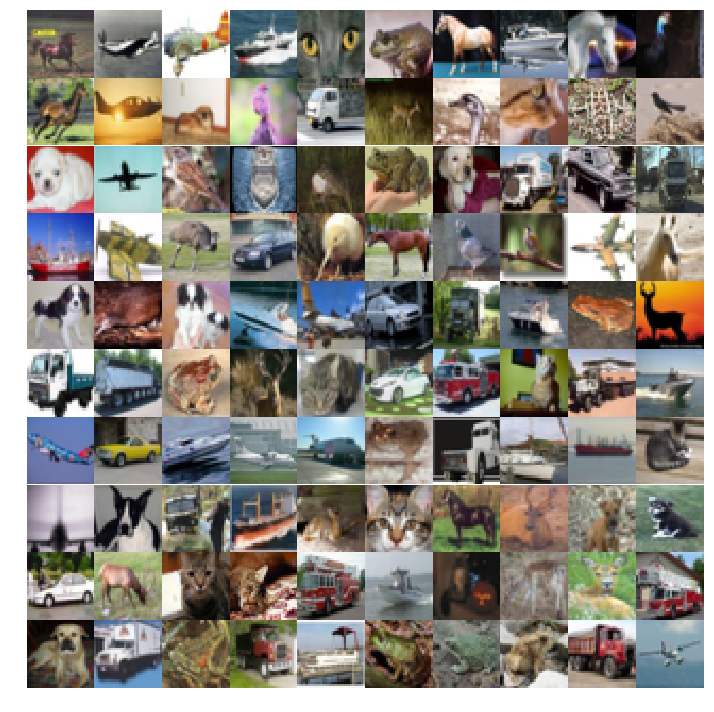

In [5]:
plot_some_imgs(TRAIN_DATA_DIR)

In [5]:
dae = tf.estimator.Estimator(model_fn=model_fn,
                             params={'latent_dims': LATENT_DIMS,
                                     'batch_size': BATCH_SIZE,
                                     'out_channels': 3,
                                     'steps_per_epoch': STEPS // EPOCHS,
                                     'decay_steps': STEPS // 20,
                                     'lr_decay': False,
                                     'is_vae': False,
                                     'lr': 0.0001},
                             model_dir='./dae')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_master': '', '_save_checkpoints_secs': 600, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5, '_service': None, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff93e7b0710>, '_session_config': None, '_task_type': 'worker', '_evaluation_master': '', '_num_ps_replicas': 0, '_train_distribute': None, '_tf_random_seed': None, '_is_chief': True, '_task_id': 0, '_save_checkpoints_steps': None, '_model_dir': './dae'}


In [ ]:
dae.train(input_fn=lambda: input_fn(get_filenames(TRAIN_DATA_DIR),
                                    IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    buffer_size=BUFFER_SIZE),
          steps=STEPS)

In [11]:
dae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-22-12:53:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-22-12:54:22
INFO:tensorflow:Saving dict for global step 84361: global_step = 84361, loss = 1831.4792


{'global_step': 84361, 'loss': 1831.4792}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


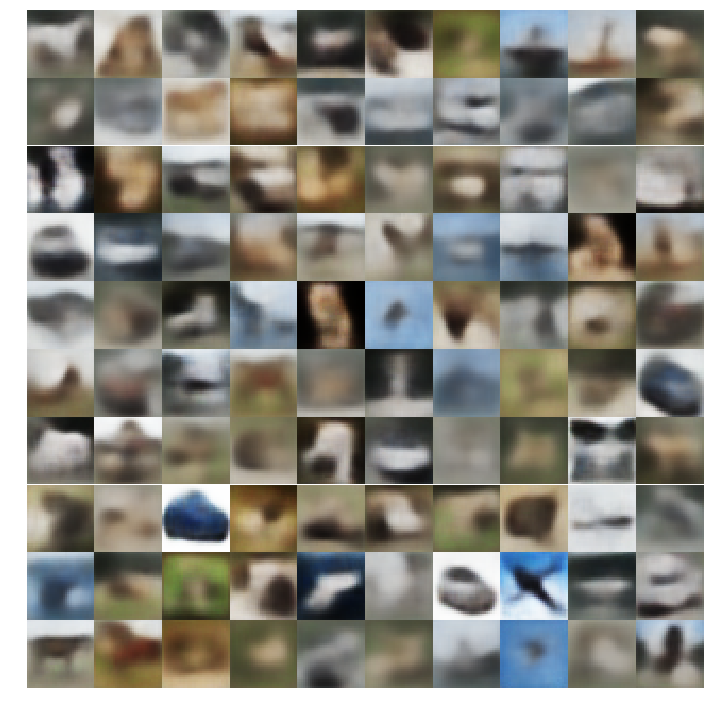

In [6]:
preds = dae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)

In [7]:
dae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       noising_ratio=0.2,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-22-12:55:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-22-12:55:51
INFO:tensorflow:Saving dict for global step 84361: global_step = 84361, loss = 1851.8424


{'global_step': 84361, 'loss': 1851.8424}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


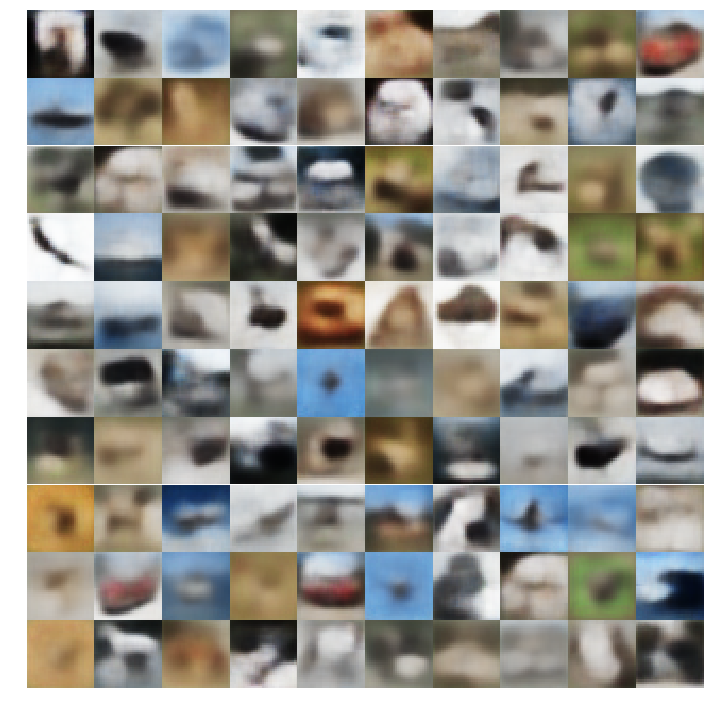

In [9]:
preds = dae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              noising_ratio=0.2,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)

In [6]:
dae.evaluate(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                       IMG_SIZE,
                                       noising_ratio=0.,
                                       batch_size=BATCH_SIZE,
                                       buffer_size=BUFFER_SIZE,
                                       shuffle=False,
                                       repeat=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-22-13:00:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-22-13:00:58
INFO:tensorflow:Saving dict for global step 84361: global_step = 84361, loss = 1985.5211


{'global_step': 84361, 'loss': 1985.5211}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dae/model.ckpt-84361
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


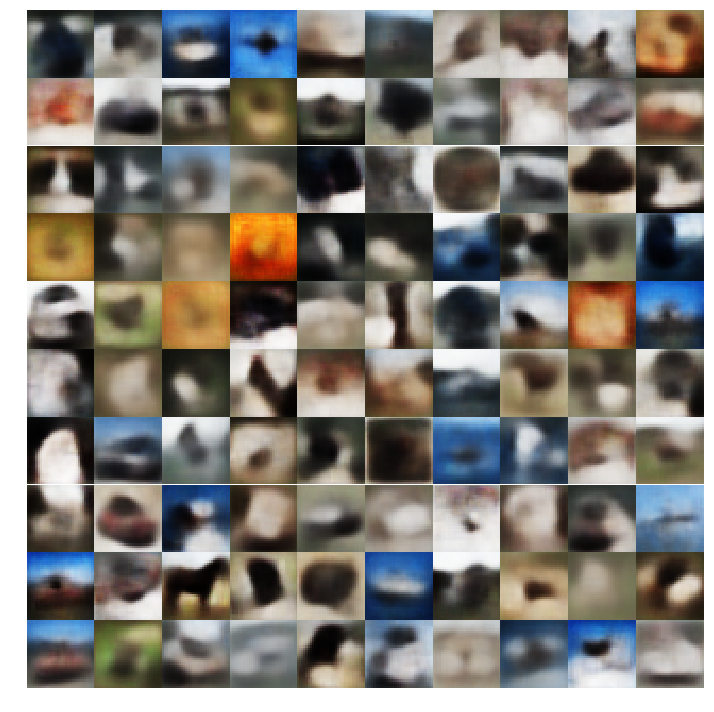

In [7]:
preds = dae.predict(input_fn=lambda: input_fn(get_filenames(DEV_DATA_DIR),
                                              IMG_SIZE,
                                              noising_ratio=0.,
                                              batch_size=BATCH_SIZE,
                                              buffer_size=BUFFER_SIZE,
                                              shuffle=False,
                                              repeat=False))
plot_decoder_out(preds)